# WQD 7006 GROUP ASSIGNMENT: CREDIT CARD FRAUD DETECTION

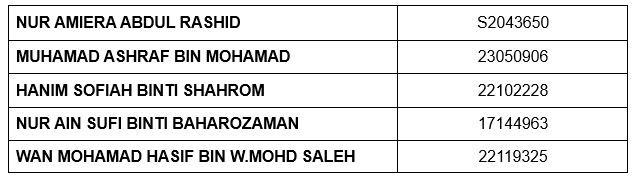

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv('/content/drive/MyDrive/WQD7006 ML/Group 19 Group Assignment ML/creditcard.csv')
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 1. Data Understanding

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

In [8]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [9]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: >

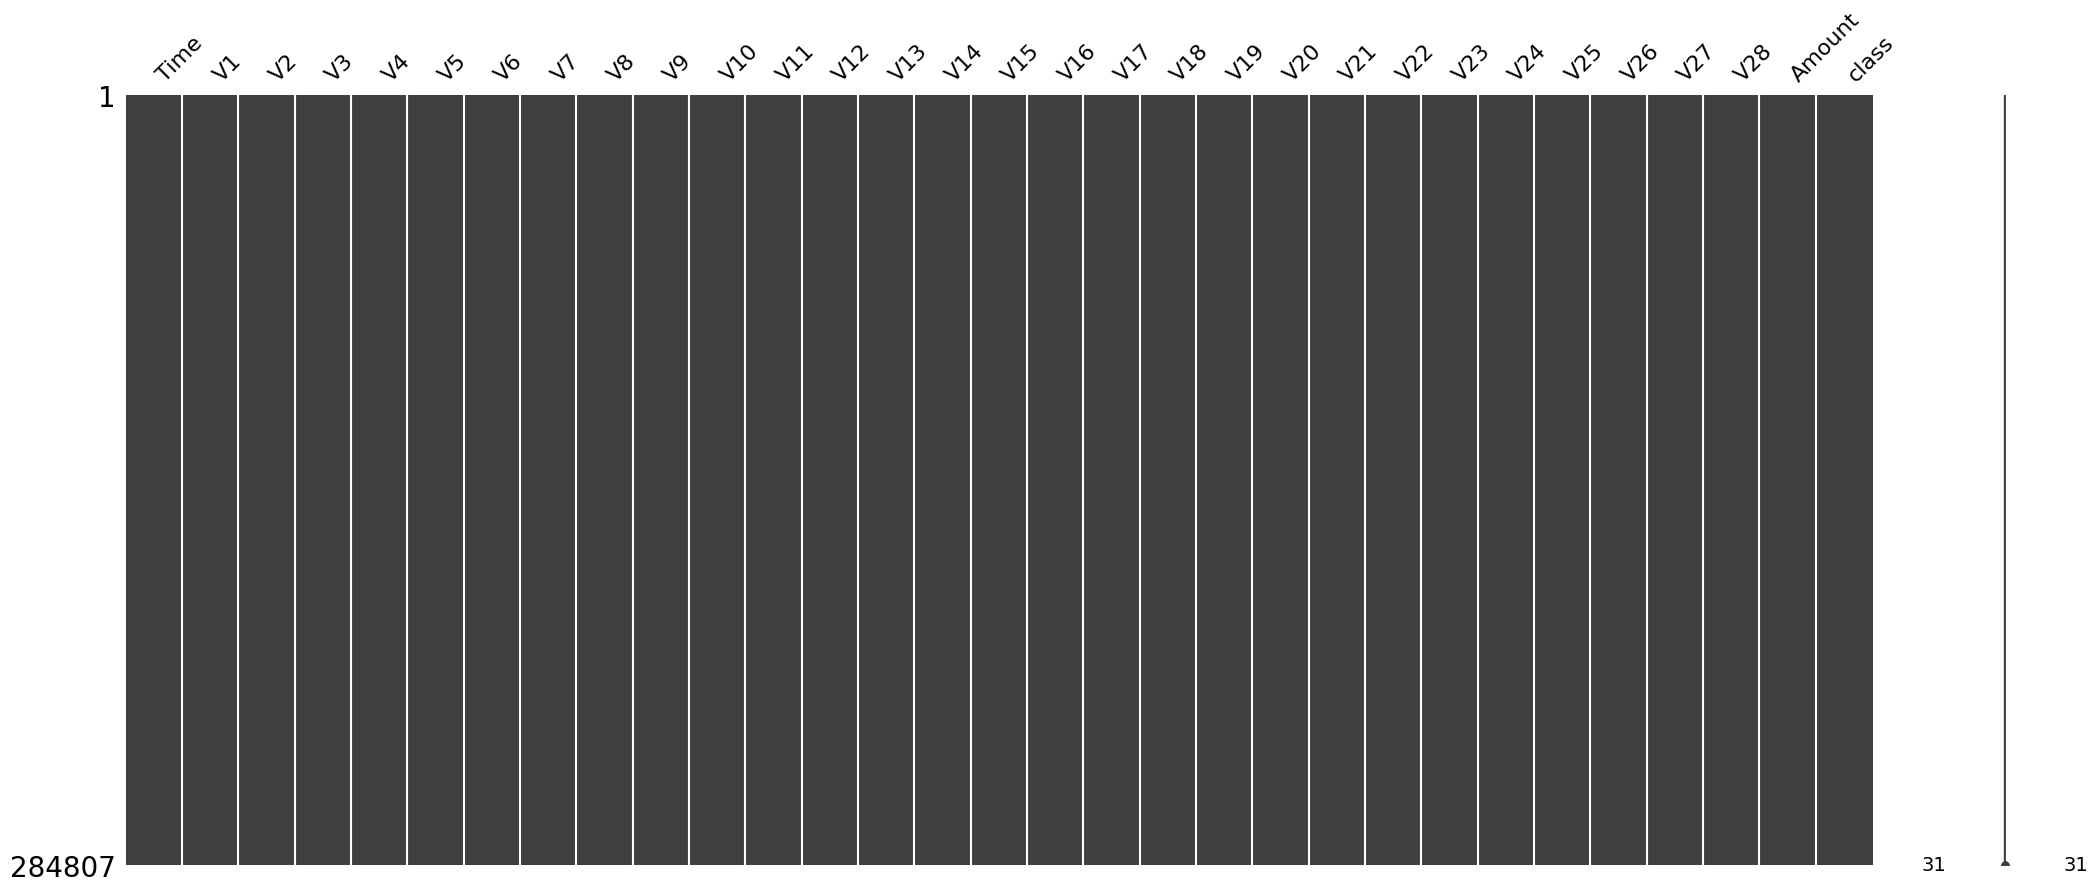

In [10]:
import missingno as mn
mn.matrix(df)

In [11]:
df.duplicated().any()

True

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observations**
- Dataset has total of `284,807 rows` and `31 columns`.
- Dataset contains no null values.
- Dataset contains duplicated values.
- The mean of principle components `V1 - V28` are close to 0, which is expected as a result of PCA which involves centering the data by subtracting the mean.
- The average transaction amount based on the feature `Amount` is approximately 88.35.

# 2. Data Preprocessing

### 2.1 Dropping Duplicated Values

In [13]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().any()

False

In [14]:
df.shape

(283726, 31)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.2 Check Skewness of Features

In [16]:
df.skew().sort_values()

V8        -8.310970
V23       -5.867221
V2        -4.695162
V17       -3.690497
V1        -3.273271
V5        -2.414079
V12       -2.199008
V3        -2.151984
V20       -2.043121
V14       -1.918804
V16       -1.051161
V27       -0.753804
V24       -0.552129
V25       -0.415744
V15       -0.309659
V18       -0.248661
V22       -0.182330
Time      -0.035581
V13        0.064293
V19        0.108312
V11        0.344074
V9         0.537663
V26        0.580292
V4         0.671504
V10        1.252967
V6         1.829880
V21        2.820033
V7         2.890271
V28       11.555115
Amount    16.978803
class     24.430545
dtype: float64

- Highly `-vely` skewed features: V8, V23, V2, V17, V1, V5, V12, V3, V20, V14
- Highly `+vely` skewed features: V6, V7, V21, V28, Amount, class

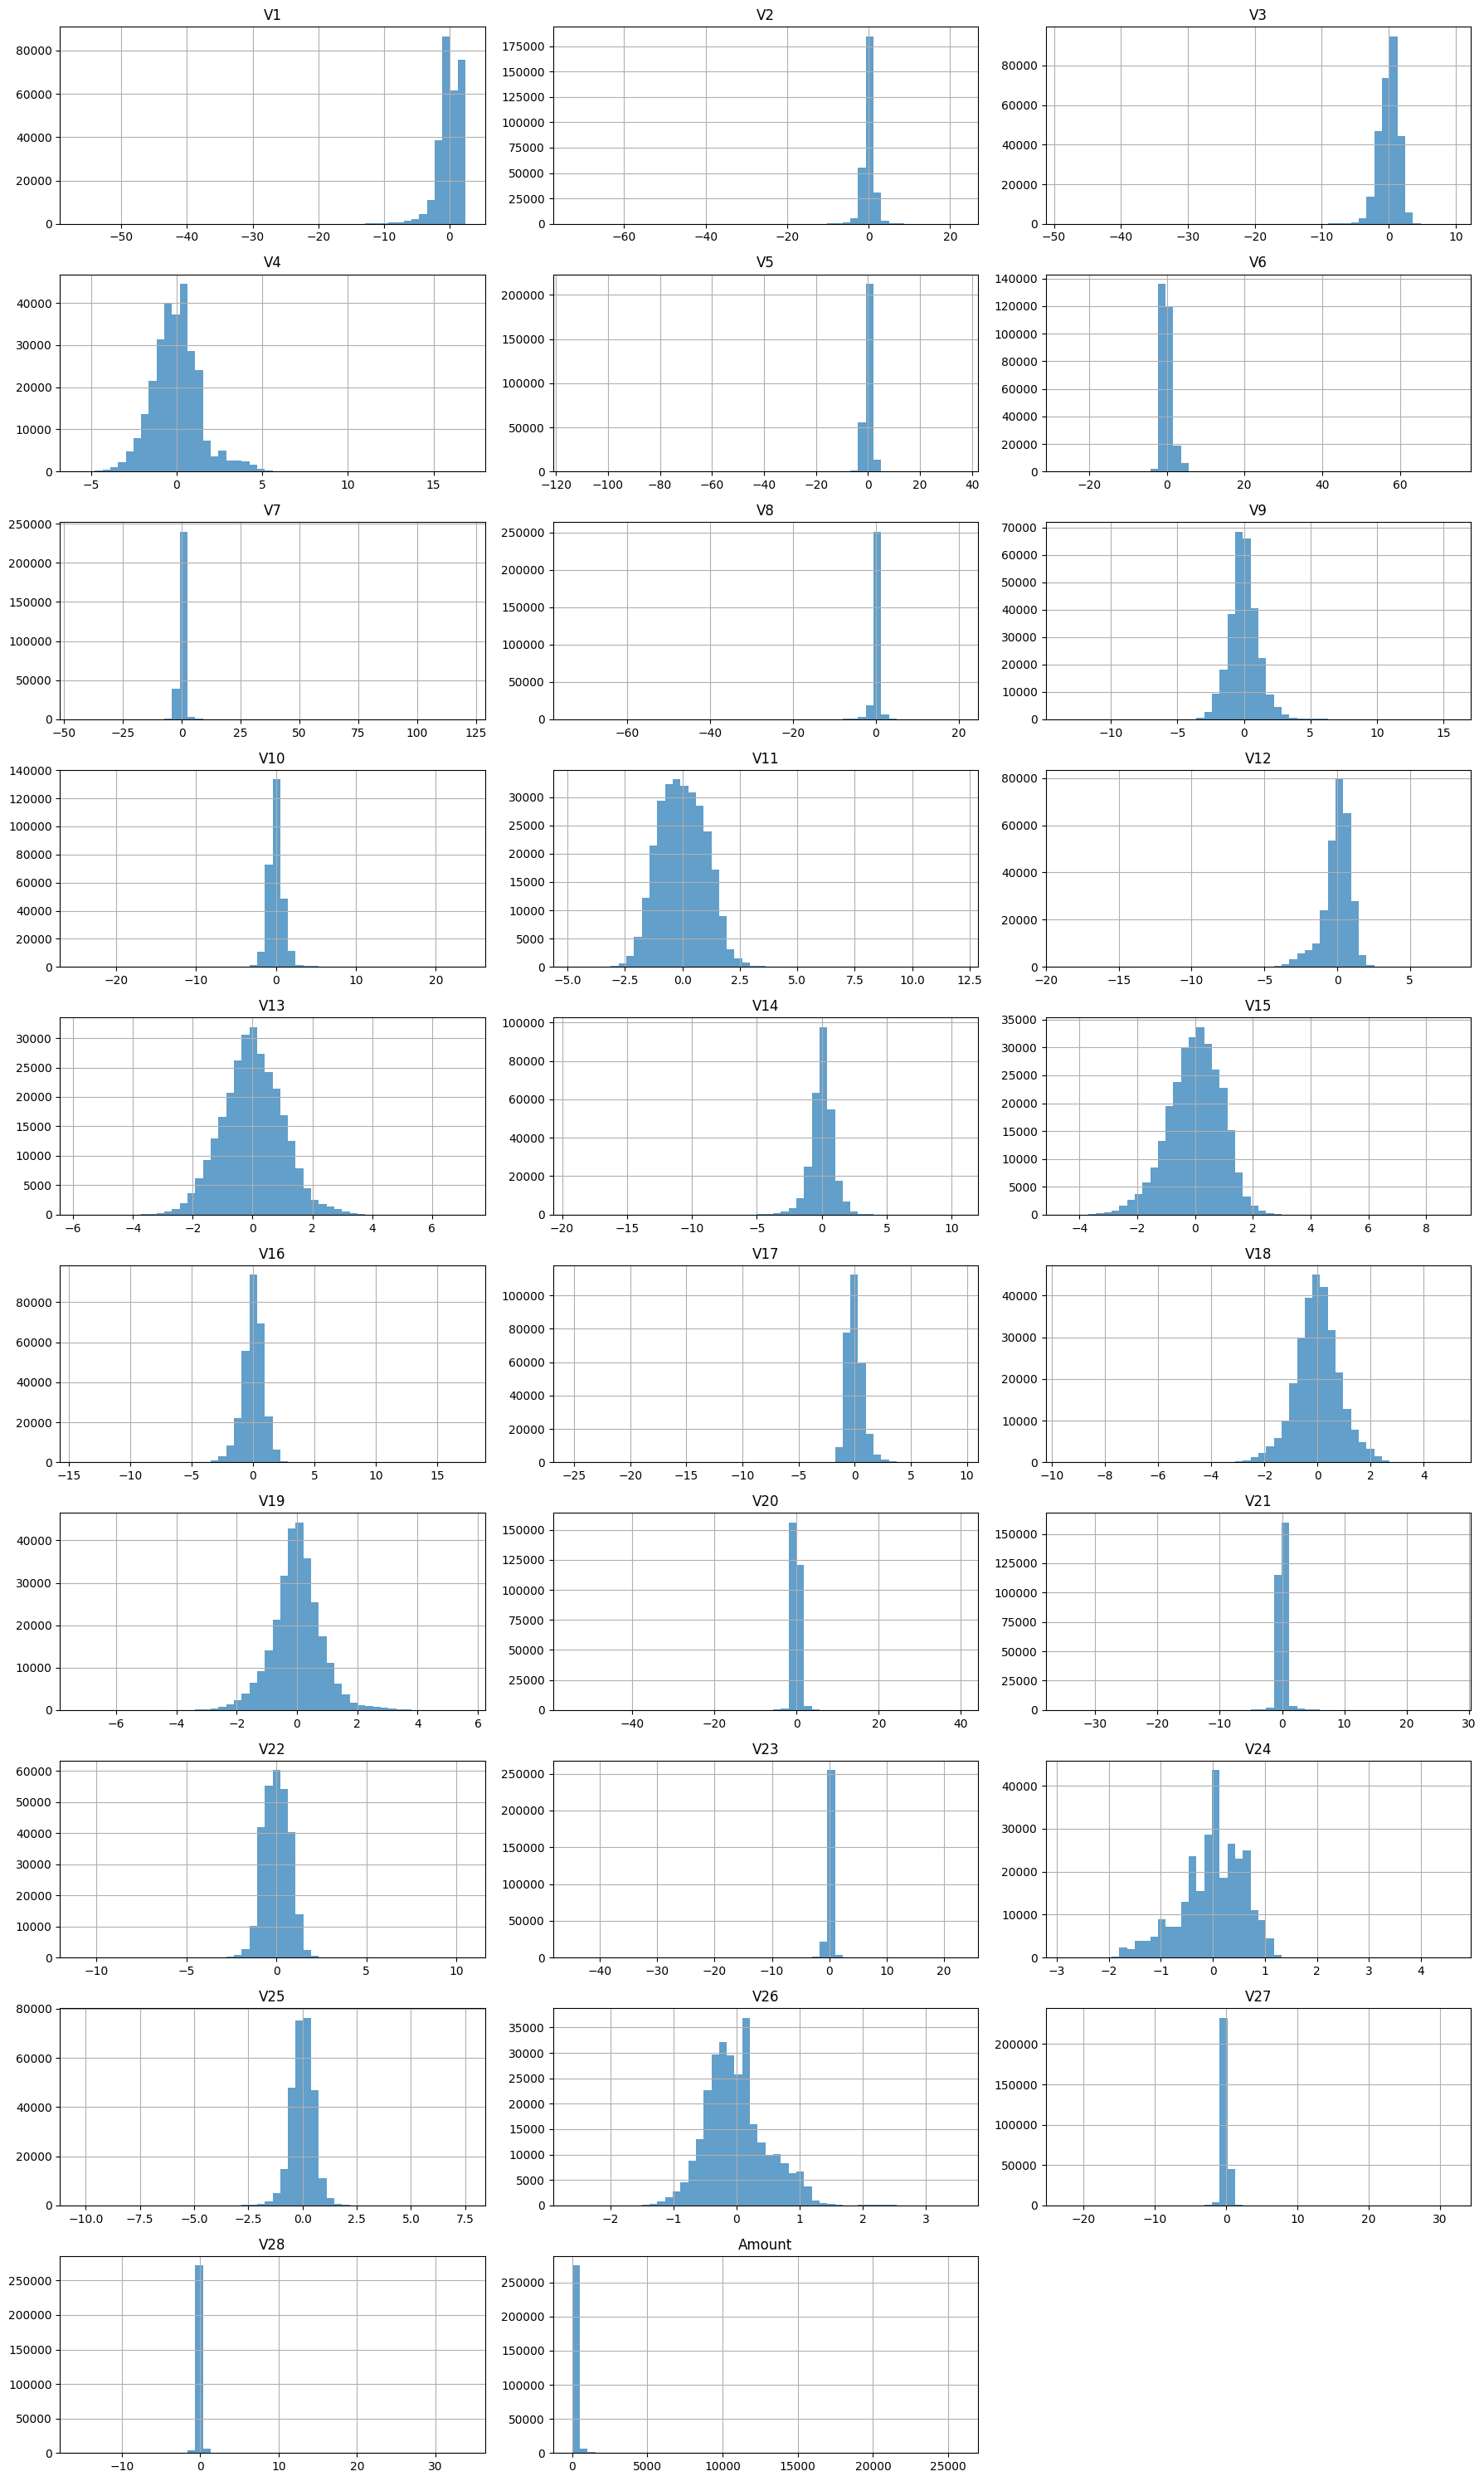

In [17]:
plt.figure(figsize=(18, 30))

# Plot histograms for each column except 'Time' and 'class'
features = df.columns.drop(['Time', 'class'])

# Create a histogram for each feature
for i, feature in enumerate(features):
    plt.subplot(10, 3, i + 1)
    df[feature].hist(bins=50, alpha=0.7)
    plt.title(feature)

plt.tight_layout()
plt.show()

# 3. Data Sampling


### Handling Imbalanced Class

In [18]:
df['class'].value_counts()

class
0    283253
1       473
Name: count, dtype: int64

,count,distribution
Genuine,283253,99.83329
Fraud,473,0.16671


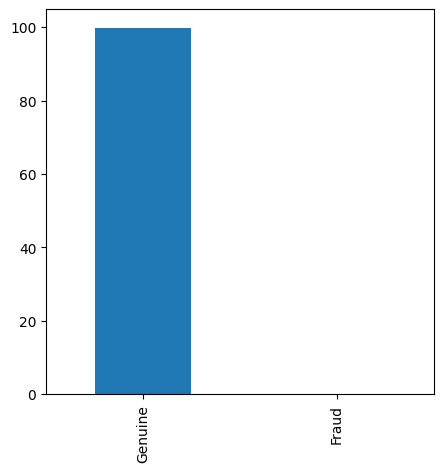

In [19]:
a = df['class'].value_counts().rename('count')
b = (df['class'].value_counts(normalize=True)*100).rename('distribution')

df_class = pd.concat([a,b], axis=1)
df_class.index = ["Genuine", "Fraud"]
df_class['distribution'].plot(kind='bar', figsize=[5,5])
df_class

- The `class` feature demonstrates `'0 - Genuine'` with a relatively higher count than `'1 - Fraud'` presenting an imbalanced distribution.

Due to the imbalanced distribution in `class`, it needs to be addressed prior to ML training and testing. In order to overcome this problem, 2 methods of sampling will be employed:


1.   Oversampling via SMOTE
2.   Undersampling



SMOTE stands for Synthetic Minority Oversampling Technique.This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases.

### 3.1 Splitting the Dataset (X = Features, y = Target)

In [20]:
# Creating factors dataset, X
X = df.drop('class', axis = 1)

# Creating target dataset, y
y = df['class']
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [23]:
# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
# to standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# fit_transform: Learn the parameters and apply the transformation to new data
X_train_scaled = scaler.fit_transform(X_train) # variable train test dataset after scaled

# transform: Apply the learned transformation to new data
X_test_scaled = scaler.transform(X_test) #variable test  dataset after scaled

In [24]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,318.00
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.32
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.99
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,6.30
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.99


In [25]:
y_train.head()

79119     0
265736    0
42801     0
172689    0
179949    0
Name: class, dtype: int64

In [26]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82
42637,41182.0,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08
882,666.0,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58
263275,160870.0,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84


In [27]:
y_test.head()

104697    0
134356    0
42637     0
882       0
263275    0
Name: class, dtype: int64

In [28]:
X_test_scaled

array([[-0.5387895 ,  0.53896015, -0.46199837, ...,  0.2518712 ,
         0.12029052, -0.12711384],
       [-0.29510086, -2.46852622,  2.64018286, ...,  1.08277702,
        -1.33294066, -0.31173338],
       [-1.12859855, -0.79769251, -0.15662003, ..., -1.2701668 ,
        -0.76122569, -0.16807877],
       ...,
       [ 0.6708949 ,  1.01232783, -0.18483459, ..., -0.21554244,
        -0.18268072, -0.21997826],
       [-0.96683426, -1.46398734, -1.41475957, ...,  0.64493323,
        -1.09651024,  0.01289592],
       [ 1.39457058, -0.03594487,  0.47606942, ...,  1.45557384,
         0.96007385, -0.31300115]])

### 3.2 Oversampling via SMOTE

In [29]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

#synthetic data X_train_smote and y_train_smote
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train) 

In [30]:
X_train_smote

array([[-0.77717232, -0.69712346, -0.65378113, ..., -0.45050471,
        -0.28613705,  0.90921189],
       [ 1.41573069, -0.03297944,  0.35495872, ..., -0.31091542,
        -0.60165535, -0.21863125],
       [-1.12714577, -0.18810283,  0.43538871, ...,  0.0731303 ,
         0.17466732, -0.27144194],
       ...,
       [ 0.07380606,  0.00598203,  1.14153118, ...,  1.0749372 ,
         0.3976658 ,  0.86002321],
       [-0.43368603,  0.5742038 ,  0.77648003, ...,  0.25885168,
         0.38549846, -0.34667639],
       [ 0.31896239, -0.77999954,  0.64854614, ...,  0.13638612,
        -0.20125674, -0.22428656]])

In [31]:
y_train_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

/tmp/ipykernel_1104/2455504466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


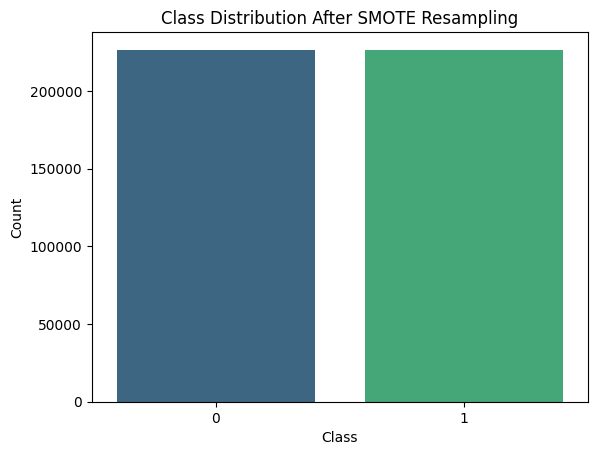

In [32]:
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
print(pd.Series(y_train_smote).value_counts())

class
0    226597
1    226597
Name: count, dtype: int64


### 3.3 Undersampling Majority Class



In [34]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

In [35]:
X_train_rus

array([[ 1.27340002e+00, -4.64638950e+00, -7.37443476e+00, ...,
        -2.36124197e+00,  1.09675335e+00,  8.13884963e+00],
       [-6.22040312e-01, -6.16673794e-01,  3.55751673e-01, ...,
        -7.53338295e-01, -3.90045507e-01, -2.97827483e-01],
       [ 9.22310668e-01,  9.38105838e-01, -1.92214194e-01, ...,
        -9.48160212e-02, -3.31103719e-02,  9.78367511e-02],
       ...,
       [-6.80446420e-01, -2.74544915e+00, -1.71547311e-01, ...,
         3.82532607e+00, -3.40635749e+00,  5.20442904e+00],
       [-1.83722003e+00,  2.11068808e-03,  2.51081008e+00, ...,
         1.84849661e+00,  1.56446338e+00, -3.46676387e-01],
       [-1.43654654e+00, -9.84656121e+00,  7.16781931e+00, ...,
         4.07832630e+00,  1.47612294e+00,  4.55014699e-02]])

In [36]:
y_train_rus.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

/tmp/ipykernel_1104/325381223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_rus, palette='viridis')


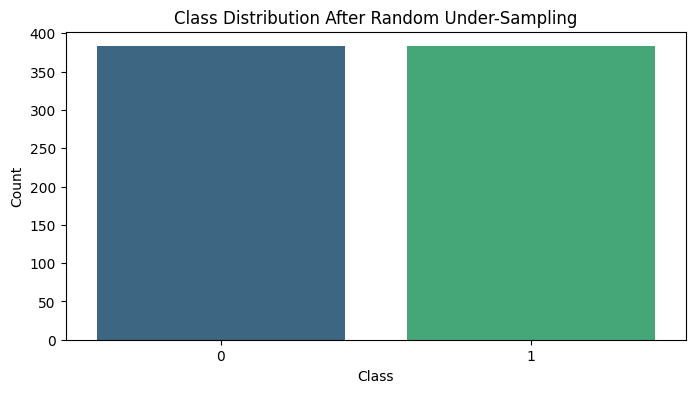

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_rus, palette='viridis')
plt.title('Class Distribution After Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [38]:
print(pd.Series(y_train_rus).value_counts())

class
0    383
1    383
Name: count, dtype: int64


# 4.0 Machine Learning


## 4.1 Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [40]:
# Define a list to store confusion matrices
confusion_matrices = []

# Define lists to store classification reports
classification_reports = {}

# Define lists to store AUC-ROC values
auc_roc_scores = []

# Define labels for the models
model_labels = ["Normalized Data", "Normalized + SMOTE Data", "Normalized + RUS Data"]

In [41]:
# Define the datasets and their corresponding names
datasets = [(X_train_scaled, y_train, "Normalized Data"),
            (X_train_smote, y_train_smote, "Normalized + SMOTE Data"),
            (X_train_rus, y_train_rus, "Normalized + RUS Data")]



In [42]:
# Initialize lists to store AUC-ROC scores and confusion matrices
auc_roc_scores = []
confusion_matrices = []
classification_reports = {}

{'0': {'precision': 0.9992591547308263, 'recall': 0.9998940977125106, 'f1-score': 0.9995765253908319, 'support': 56656.0}, '1': {'precision': 0.8888888888888888, 'recall': 0.5333333333333333, 'f1-score': 0.6666666666666667, 'support': 90.0}, 'accuracy': 0.9991541254009093, 'macro avg': {'precision': 0.9440740218098576, 'recall': 0.766613715522922, 'f1-score': 0.8331215960287492, 'support': 56746.0}, 'weighted avg': {'precision': 0.9990841058476315, 'recall': 0.9991541254009093, 'f1-score': 0.9990485254034288, 'support': 56746.0}}
{'0': {'precision': 0.9998190274535353, 'recall': 0.9751306128212369, 'f1-score': 0.9873205078945252, 'support': 56656.0}, '1': {'precision': 0.053727333781061114, 'recall': 0.8888888888888888, 'f1-score': 0.10132995566814439, 'support': 90.0}, 'accuracy': 0.9749938321643816, 'macro avg': {'precision': 0.5267731806172983, 'recall': 0.9320097508550629, 'f1-score': 0.5443252317813347, 'support': 56746.0}, 'weighted avg': {'precision': 0.99831851195587, 'recall':

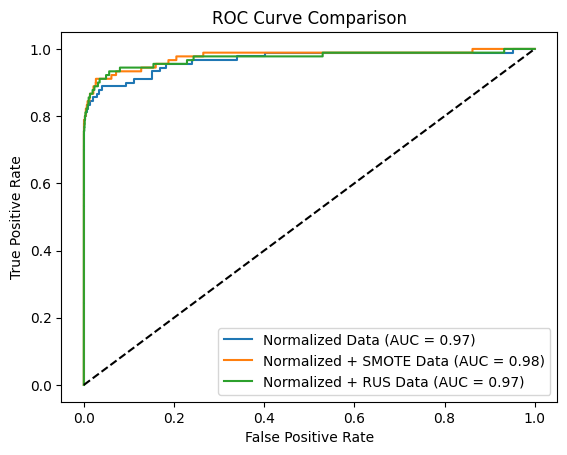

AUC-ROC for Normalized Data: 0.967
AUC-ROC for Normalized + SMOTE Data: 0.977
AUC-ROC for Normalized + RUS Data: 0.973


In [43]:

# Loop through each dataset, train Logistic Regression, and evaluate performance
for X_train, y_train, data_name in datasets:
    # Train Logistic Regression
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)

    # Predict using the trained model
    y_pred = logreg.predict(X_test_scaled)

    # Predict probabilities using the trained model
    y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

    # Calculate fpr, tpr, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_roc_scores.append(auc)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((data_name, cm))

    # Evaluate the performance and store the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[data_name] = report
    print(classification_reports[data_name])

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{data_name} (AUC = {auc:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Labeling the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Assigning the plot to a variable name
roc_curve_plot = plt.gcf()

# Show the plot
plt.show()

# Display AUC-ROC scores
for data_name, auc_roc in zip(model_labels, auc_roc_scores):
    print(f'AUC-ROC for {data_name}: {auc_roc:.3f}')



## 4.1 Logistic regression evaluation



### 4.1.1 Confusion Matrix

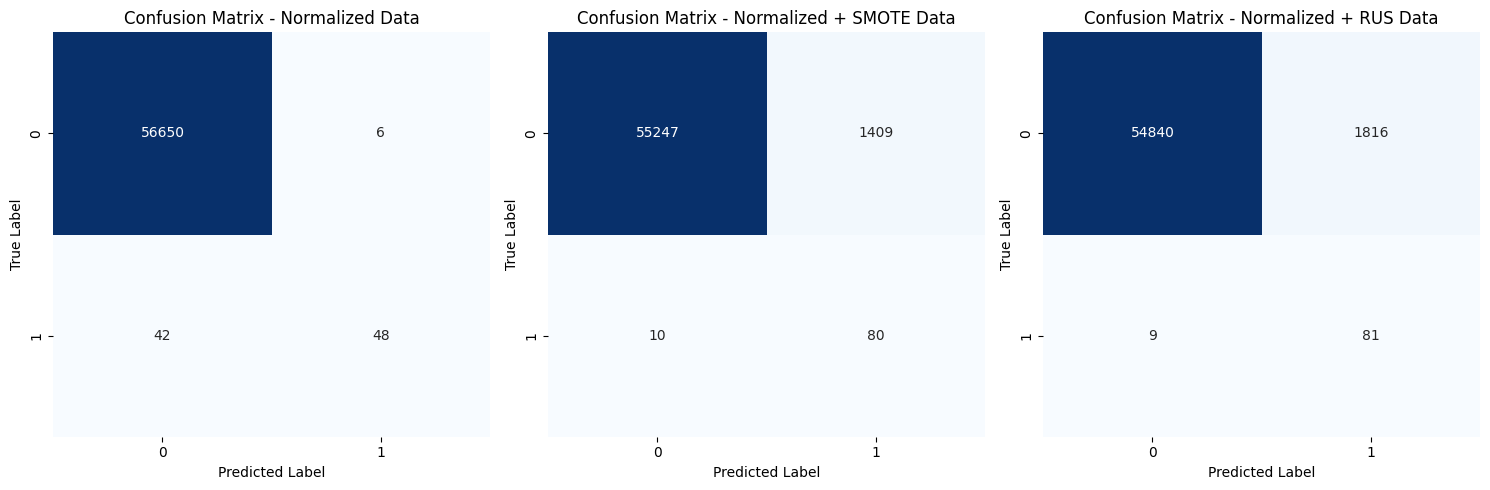

In [44]:
# Plotting confusion matrices
plt.figure(figsize=(15, 5))
for i, (data_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {data_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

### 4.1.2 Accuracy, Precision, Recall and F-1 Score

- **Precision (Class 0):** Measures the accuracy of the model in correctly predicting non-fraudulent (genuine) transactions among all transactions predicted as non-fraudulent.
- **Recall (Class 0):** Calculates the proportion of actual non-fraudulent (Genuine) transactions that the model correctly identifies.
- **F1-score (Class 0):** The harmonic mean of precision and recall for the negative class. It provides a balanced measure of a model's performance in predicting non-fraudulent transactions.
- **Precision (Class 1):** Measures the accuracy of the model in correctly predicting fraudulent transactions among all transactions predicted as fraudulent.
- **Recall (Class 1):** Calculates the proportion of actual fraudulent transactions that the model correctly identifies.
- **F1-Score (Class 1):** The harmonic mean of precision and recall for the positive class. It provides a balanced measure of a model's performance in predicting fraudulent transactions.
- **Accuracy:** the overall correctness of the model across both classes. It measures the proportion of correctly classified transactions (both fraudulent and non-fraudulent) out of all transactions.
- **Weighted Avg F1-Score:** The weighted average F1-score considers the F1-score of each class weighted by the number of true instances for each class. It provides a comprehensive measure of the model's performance across both classes while accounting for class imbalance.


| Model   | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy | Weighted Avg F1-Score |
|---------|---------------------|------------------|---------------------|---------------------|------------------|---------------------|----------|----------------------|
| Normalized| 0.999               | 0.9999           | 0.9996              | 0.889               | 0.533            | 0.667               | 0.9992   | 0.999                |
| Normalized + SMOTE | 0.9998              | 0.9751           | 0.9873              | 0.054               | 0.889            | 0.101               | 0.975    | 0.986                |
| Normalized + RUS | 0.9998              | 0.9679           | 0.9836              | 0.043               | 0.9              | 0.082               | 0.9678   | 0.982                |



In [45]:
# Extract performance metrics from classification reports
accuracy_scores = [classification_reports[model]['accuracy'] for model in model_labels]
precision_scores = [classification_reports[model]['1']['precision'] for model in model_labels]
recall_scores = [classification_reports[model]['1']['recall'] for model in model_labels]
f1_scores = [classification_reports[model]['1']['f1-score'] for model in model_labels]


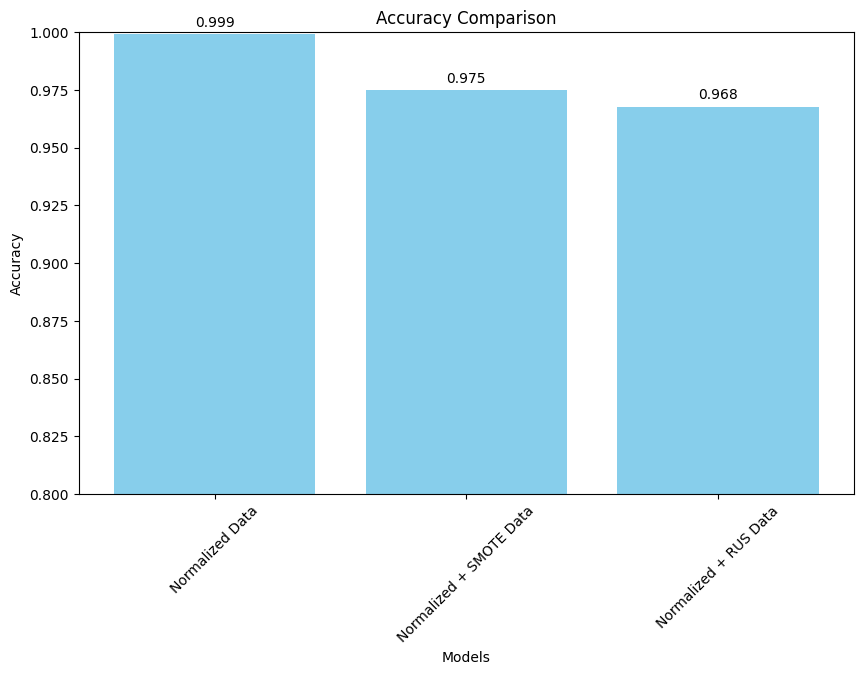

In [46]:
plt.figure(figsize=(10, 6))
bars = plt.bar(model_labels, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)

# Annotate the bars with accuracy scores
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

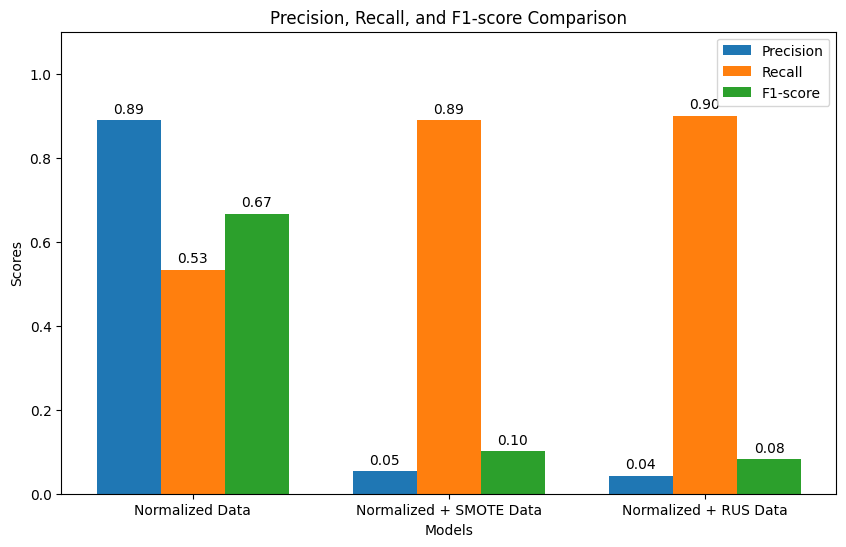

In [47]:
# Plotting precision, recall, and F1-score comparison as bar charts
metrics_labels = ['Precision', 'Recall', 'F1-score']
metrics_values = [precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(10, 6))
x = np.arange(len(model_labels))  # the label locations
width = 0.25  # the width of the bars

for i, (metric_label, metric_values) in enumerate(zip(metrics_labels, metrics_values)):
    bars = plt.bar(x + i * width, metric_values, width=width, label=metric_label)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score Comparison')
plt.xticks(ticks=x + width, labels=model_labels)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

**Normalized Data:**
- This model seems to perform well across both classes (fraudulent and non-fraudulent transactions), suggesting that the normalized data alone provides a good basis for fraud prediction.
- High precision, recall, and F1-score for both classes indicate that the model can identify fraudulent transactions accurately without significantly misclassifying non-fraudulent ones.
- An AUC-ROC of 0.967 indicates that this model has good discriminatory power. It can distinguish between fraudulent and non-fraudulent transactions quite well.
- This value suggests that the model performs well in ranking transactions by their likelihood of being fraudulent, with a high true positive rate and a low false positive rate.

**Normalized + SMOTE Data:**
- SMOTE was done to deal with the class imabalnce identfied in the original data, which is common in fraud detection where fraudulent transactions are often rare compared to genuine ones.
- While SMOTE improves recall for fraudulent transactions, the lower precision and F1-score for fraud detection in this model imply that it might be flagging more genuine transactions as fraudulent (increased false positives).
- The higher AUC-ROC of 0.977 for this model compared to previous model suggests that SMOTE has improved the model's ability to differentiate between fraudulent and non-fraudulent transactions.
- The higher AUC-ROC generally indicates better overall performance in terms of discrimination and ranking of transactions.

**Normalized + RUS Data:**
- RUS was also done to balance the dataset by reducing the majority class (non-fraudulent transactions), which can also help in handling class imbalance.
- Similar to SMOTE, this model shows improved recall for fraudulent transactions but at the cost of lower precision and F1-score for fraud detection, indicating a higher rate of false positives.
- Similar to logistic regression done to normalized + SMOTE data, the AUC-ROC of 0.973 for this model indicates good discriminatory power. RUS has also helped improve the model's ability to rank transactions by their likelihood of being fraudulent.
- However, it's worth noting that while AUC-ROC is higher than Logistic Regression done on Normalized data, the trade-offs in precision, recall, and F1-score (as discussed earlier) should also be considered.

## 5.0 Explainable AI with SHAP

In [48]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
import shap

shap.initjs()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


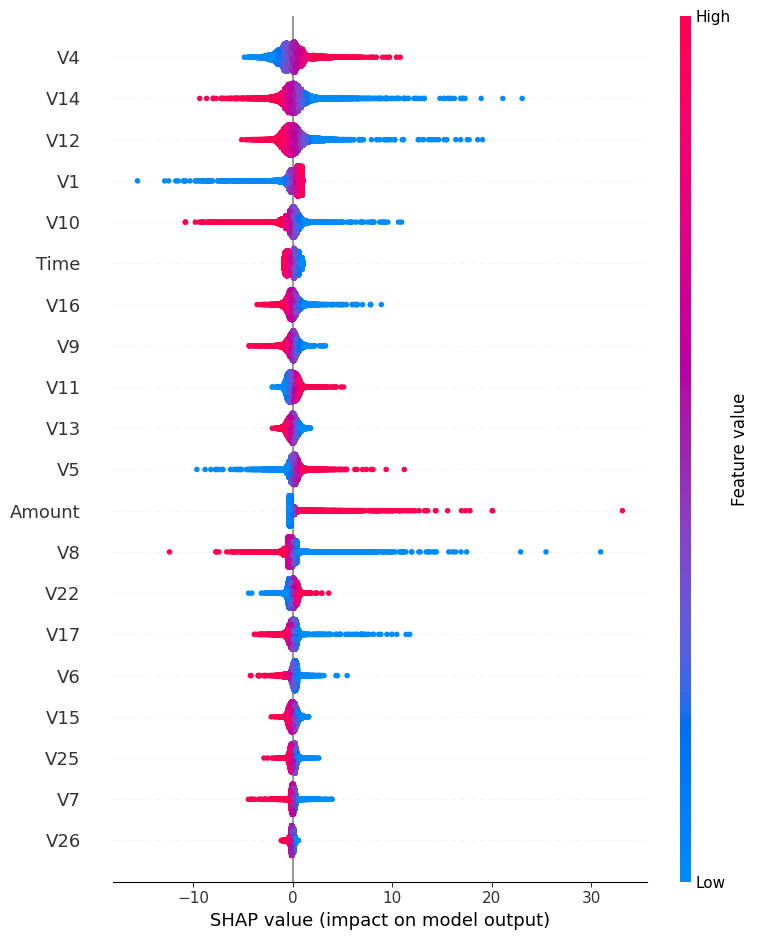

In [64]:
# Initialize the SHAP explainer with the Logistic Regression model
explainer = shap.Explainer(logreg, X_train_scaled)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

# Explain individual predictions (e.g., the first instance in the test data)
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])

